<a href="https://colab.research.google.com/github/rajasafi/Sales_Analysis/blob/main/salesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **This project involves a comprehensive analysis of 12 months' worth of sales data from an electronics store using Python's Pandas and Matplotlib libraries. The dataset is cleaned meticulously, addressing missing data, conditional row removal, and column type conversions to ensure data integrity.**

In the data exploration phase, five key business questions are tackled:

Best Sales Month: The project identifies the best sales month and calculates the revenue generated during that period.

Top Selling City: The analysis determines the city with the highest product sales volume, which can inform marketing and distribution strategies.

Optimal Advertising Timing: The project explores when to display advertisements to maximize the likelihood of customer purchases.

Frequently Purchased Products: It identifies which products are most frequently sold together, opening opportunities for product bundling.

Best-Selling Product: The project discovers the product that sold the most and explores factors contributing to its popularity.

Various techniques are employed, including data concatenation, feature engineering, function application, grouping, aggregation, and data visualization. Matplotlib is used to generate informative graphs with clear labeling.

In conclusion, this project showcases the power of Pandas and Matplotlib for cleaning, exploring, and analyzing complex sales data. The insights gained from answering critical business questions can drive data-driven decisions to improve sales strategies, marketing campaigns, and product offerings. The provided Colab Notebook and code files offer a detailed look into the analysis process for those looking to apply similar techniques to their datasets.

# Sales Analysis

In [1]:
import pandas as pd
import os
import csv

### Merging the 12 Month of sales datain to single CSV file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### List all the files in the directory


> We will Set the path to the directory where your files are located. We can modify the path according to our file structure.

> Get the list of files: Using the os.listdir() function to get a list of files in the specified directory:



```



In [3]:
directory ='/content/drive/MyDrive/ML Dataset/SalesAnalysis'
file_list = os.listdir(directory)

#### Iterating through the file list, read each file, and append its content to a CSV file.

In [4]:
# Create a new CSV file
output_file_path = '/content/drive/MyDrive/merged_files.csv'
with open(output_file_path, 'w', newline='') as output_file:
    writer = csv.writer(output_file)

    # Iterate through each file
    for file_name in file_list:
        file_path = os.path.join(directory, file_name)

        # Check if the path is a file or a directory
        if os.path.isfile(file_path):
            # Read the file and write its content to the CSV file
            with open(file_path, 'r') as input_file:
                reader = csv.reader(input_file)
                for row in reader:
                    writer.writerow(row)

### Read in updated dataframe

In [5]:
df=pd.read_csv('/content/drive/MyDrive/ML Dataset/SalesAnalysis/Output/all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### visualize the shape of data

In [6]:
df.shape


(186850, 6)

## Clean up the data  for better performance

In [7]:
nan_df=df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df=df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find unnecesary data and delete it

In [10]:
temp_df=df[df['Order Date'].str[0:2] =='Or']
temp_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


##### There is so many duplicates ROW in data frame so we are going to drop that all ROW from the Dataframe.

In [11]:
df=df[df['Order Date'].str[0:2] !='Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### This column is in in string format so we need to convert it into date format and then convert it into integer format to get in its proper **type()**



> To Do this we will use pandas function **pd.to_numeric()** to convert in its proper type



In [14]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

# Feature Engineering And Cleaning
### Augment Data with additional columns

> ### Task2: ADD Month Column in the Dataframe

In [12]:
df['Month'] =df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Exploratory Data visualization

### Task3: ADD sales Column in the Dataframe

### Question 1: What was the best month for sales? How much was earned that month?

In [15]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: ADD a City Column


```
# How city column will going to add

get_city(address): This function takes an address as input and returns the
city name.

It uses the split(",") function to split the address string into a list using commas as the delimiter.
It retrieves the second element of the resulting list, which represents the city name.
It uses the strip(" ") function to remove any leading or trailing spaces from the city name.
Finally, it returns the cleaned city name.
get_state(address): This function takes an address as input and returns the state abbreviation.

It uses the split(",") function to split the address string into a list using commas as the delimiter.
It retrieves the third element of the resulting list, which represents the state and postal code.
It uses the split(" ") function to split the state and postal code into a new list using whitespace as the delimiter.
It retrieves the second element of the new list, which represents the state abbreviation.
Finally, it returns the state abbreviation.
The code snippet then applies these functions to each element of the 'Purchase Address' column in the 'all_data' DataFrame using the apply() function and a lambda function.

The lambda function calls get_city(x) and get_state(x) for each address x to get the city and state abbreviation respectively.
It combines the city and state abbreviation using string formatting in the format "City (State)".
The resulting values are assigned to a new 'City' column in the 'all_data' DataFrame.
Finally, the updated DataFrame with the 'City' column is displayed using all_data.head().
```

In [25]:
# we will use apply function
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_State(address):
    return address.split(',')[2].split(' ')[1]

# we can also write in this way
df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_State(x)+')')
                 #OR
#df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_State(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
Month_sales=df.groupby(['Month']).sum()

<ipython-input-20-1d6e6ee4836a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Month_sales=df.groupby(['Month']).sum()


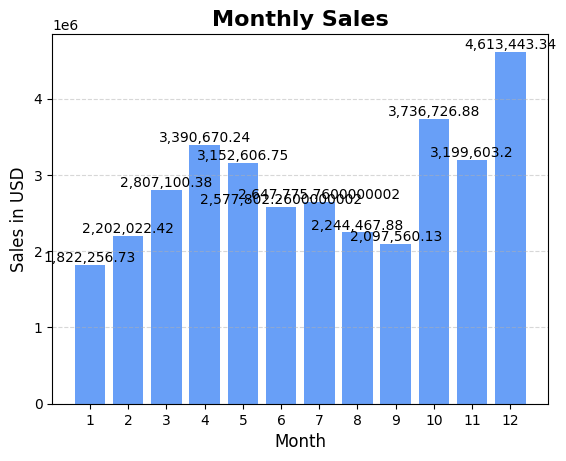

In [22]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'Month_sales' with the 'Sales' and 'Month' columns

# Define the months as a range from 1 to 12
months = range(1, 13)

# Create a figure and axis objects
fig, ax = plt.subplots()

# Create a bar plot with customized colors and transparency
ax.bar(months, Month_sales['Sales'], color='#4287f5', alpha=0.8)

# Set the x-axis ticks to be the months
ax.set_xticks(months)

# Set the y-axis label with a larger font size
ax.set_ylabel('Sales in USD', fontsize=12)

# Set the x-axis label with a larger font size
ax.set_xlabel('Month', fontsize=12)

# Set a title for the plot
ax.set_title('Monthly Sales', fontsize=16, fontweight='bold')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels to the bars
for i, sales in enumerate(Month_sales['Sales']):
    ax.text(i+1, sales, f'{sales:,}', ha='center', va='bottom')

# Customize the plot aesthetics
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.family'] = 'Arial'

# Display the plot
plt.show()

#### Question 2: What city had the highest number of sales?

In [26]:
Month_sales=df.groupby(['City']).sum()
Month_sales

<ipython-input-26-c176215393b0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Month_sales=df.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


### Plotting the city visualization According to sales growth in 12 months

####

```
# Different way to plot

The reason for using cities = df['City'].unique() and keys = [city for city, df in all_data.groupby(['City'])] is because they serve different purposes.

cities = df['City'].unique(): This line of code extracts all unique values from the 'City' column of the DataFrame df and stores them in the cities variable. This is useful when you want to get a list of all unique cities present in the dataset. It gives you a list of unique city names without any duplicates.

keys = [city for city, df in all_data.groupby(['City'])]: This line of code uses the groupby() function to group the DataFrame all_data by the 'City' column. It then iterates over the groups and extracts the 'City' value for each group, storing them in the keys variable. This is useful when you want to get a list of all unique city names, but also have access to the individual groups of data associated with each city.

The difference between the two approaches is that df['City'].unique() gives you a simple list of unique city names, while all_data.groupby(['City']) groups the data by city and provides access to the individual groups as separate DataFrames. Depending on your specific requirements, you can choose the approach that best suits your needs.
```








<ipython-input-35-b8410bc2b0c0>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_city = df.groupby(['City']).sum()['Sales']


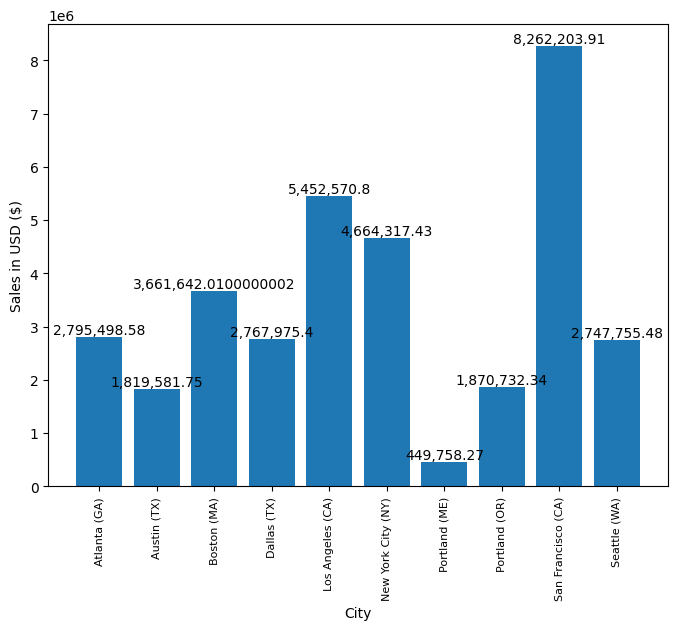

In [35]:
import matplotlib.pyplot as plt

# Group the data by city and calculate the sum of sales for each city
sales_by_city = df.groupby(['City']).sum()['Sales']

# Get the unique cities as keys
keys = sales_by_city.index

# Create a bar plot
plt.bar(keys, sales_by_city)

# Set the y-axis label
plt.ylabel('Sales in USD ($)')

# Set the x-axis label
plt.xlabel('City')

# Rotate and resize the x-axis tick labels
plt.xticks(rotation='vertical', size=8)

# Add data labels to the bars
for i, sales in enumerate(sales_by_city):
    plt.text(i, sales, f'{sales:,}', ha='center', va='bottom')

# Display the plot
plt.show()

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)




```
# The line df['Order Date'] = pd.to_datetime(df['Order Date']) is used to convert the 'Order Date' column in the DataFrame df from a string
 format to a datetime format using the pd.to_datetime() function from the pandas library.

By converting the 'Order Date' column to a datetime format, we can perform various datetime operations and analysis on the column.
 This includes extracting specific components of the date (e.g., year, month, day), filtering the data based on specific date ranges,
 and performing time-based calculations.

Converting the 'Order Date' column to a datetime format is a common preprocessing step when working with time-series data or
 any analysis that involves dates and times.
```



In [37]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [ ]:
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute
df['Count']=1
df.head()

<ipython-input-60-ef47843ecec7>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in df.groupby(['Hour'])]


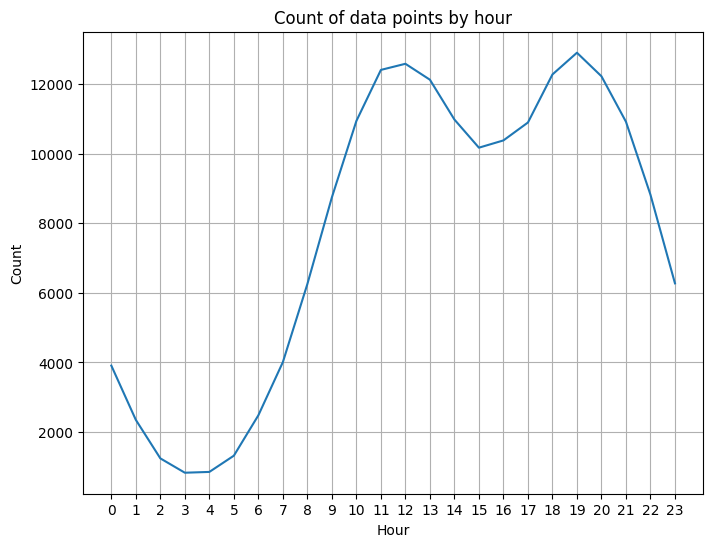

In [60]:
keys = [pair for pair, df in df.groupby(['Hour'])]
counts = df.groupby(['Hour']).count()['Count']

plt.plot(keys, counts)
plt.xticks(keys)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count of data points by hour')
plt.show()

#### from this visualization we can conclude that the best time to display advertisements is 11:00 AM and 7:00 PM

# Question 4: What products are most often sold together?

In [68]:
Sold_data=df[df['Order ID'].duplicated(keep=False)]
Sold_data['Grouped_product']=Sold_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
Sold_data = Sold_data[['Order ID','Grouped_product']].drop_duplicates()
Sold_data.head(100)

<ipython-input-68-a47f72adbd00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sold_data['Grouped_product']=Sold_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped_product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [72]:
from collections import Counter
from itertools import combinations

count = Counter()
for row in Sold_data['Grouped_product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(20):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

# Question 5:What product sold the most? Why do you think it sold the most?






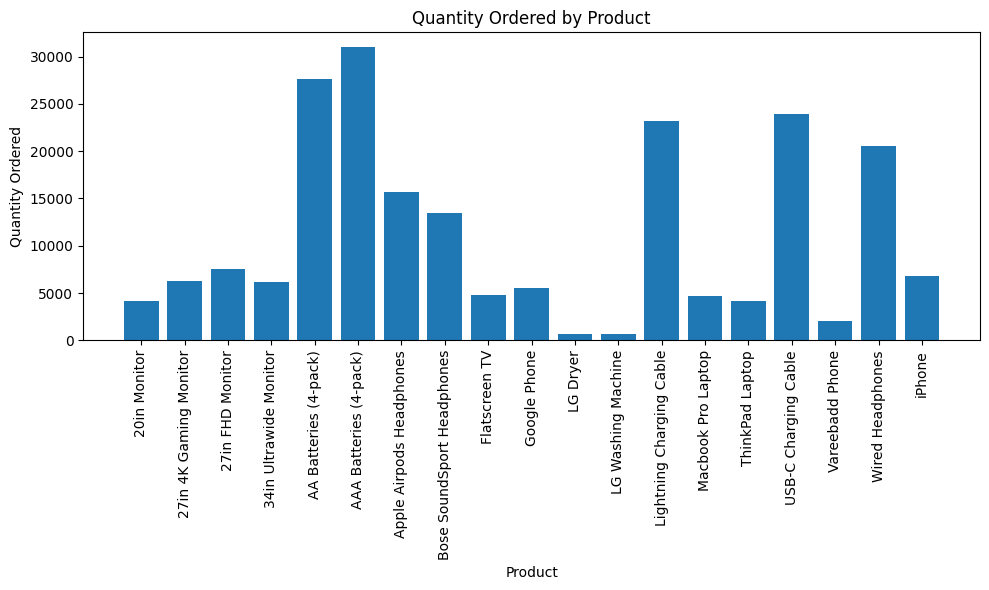

In [84]:
from pandas.core.array_algos import quantile
from numpy import product
import seaborn as sns

product_groups = df.groupby('Product')
keys = [pair for pair, Sold_data in product_groups]
quantity_ordered = [Sold_data['Quantity Ordered'].sum() for pair, Sold_data in product_groups]

plt.figure(figsize=(10, 6))
plt.bar(keys, quantity_ordered)
plt.xticks(rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Product')
plt.tight_layout()
plt.show()

<ipython-input-86-eed5dab26168>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('Product').mean()['Price Each']
<ipython-input-86-eed5dab26168>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


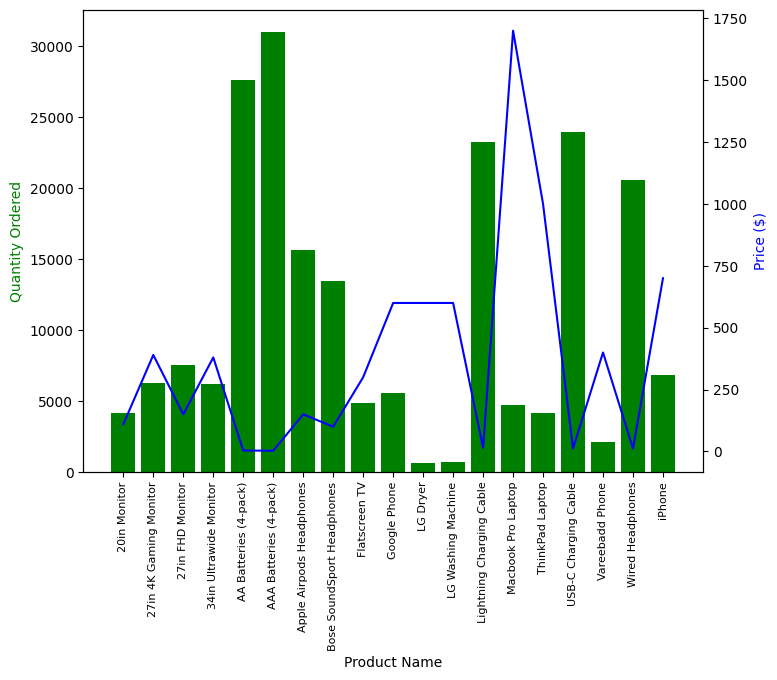

In [86]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

In [87]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1
